In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

In [42]:
single_image = X_train[0]

In [43]:
single_image.shape

(28, 28)

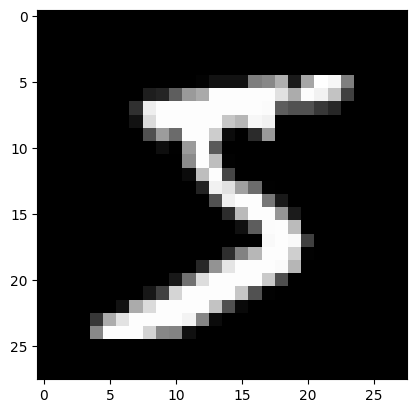

In [44]:
plt.imshow(single_image,cmap='gray')

In [45]:
y_train.shape

(60000,)

In [46]:
X_train.min()

0

In [47]:
X_train.max()

255

In [48]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [49]:
X_train_scaled.min()

0.0

In [50]:
X_train_scaled.max()

1.0

In [51]:
y_train[0]

5

In [52]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [53]:
type(y_train_onehot)

numpy.ndarray

In [54]:
y_train_onehot.shape

(60000, 10)

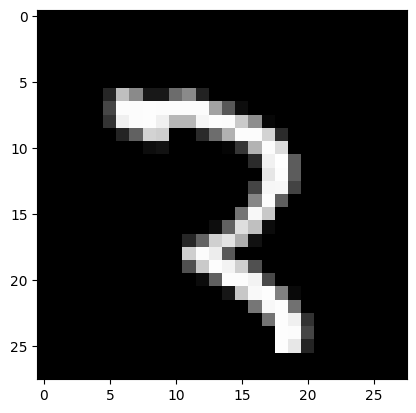

In [55]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [56]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [58]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                147488    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                      

In [61]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.1883 - accuracy: 0.9442 - val_loss: 0.0591 - val_accuracy: 0.9813
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0446 - val_accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0448 - val_accuracy: 0.9871


In [62]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.188283,0.944233,0.059095,0.9813
1,0.055528,0.983067,0.044633,0.9849
2,0.039509,0.987867,0.043350,0.9860
3,0.029459,0.990750,0.048017,0.9858
4,0.021651,0.993383,0.044789,0.9871


NAME : YAMUNAASRI T S
REGNO : 212222240117


<Axes: >

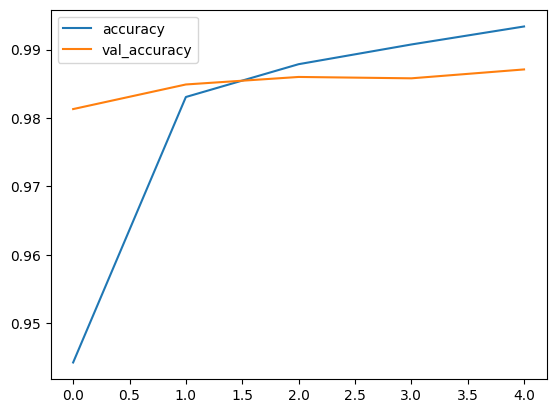

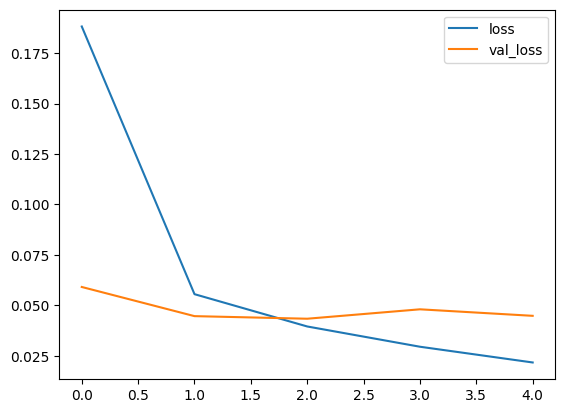

In [79]:
print("NAME : YAMUNAASRI T S")
print("REGNO : 212222240117")
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [64]:
x_test_predictions = np.argmax(model.predict(X_test_scaled),axis=1)

313/313 [==============================] - 1s 2ms/step


In [80]:
print("NAME : YAMUNAASRI T S")
print("REGNO : 212222240117")
print(confusion_matrix(y_test,x_test_predictions))

NAME : YAMUNAASRI T S
REGNO : 212222240117
[[ 963    1    3    1    3    2    6    0    0    1]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   0    2 1028    0    0    0    0    2    0    0]
 [   0    0    2  997    0    9    0    1    0    1]
 [   0    0    0    0  974    0    1    0    0    7]
 [   0    1    0    3    0  887    1    0    0    0]
 [   1    3    0    0    4    1  948    0    1    0]
 [   1    3   11    1    1    0    0 1009    1    1]
 [   3    0    6    1    3    2    2    5  946    6]
 [   0    3    1    0   10    4    0    4    0  987]]


In [81]:
print("NAME : YAMUNAASRI T S")
print("REGNO : 212222240117")
print(classification_report(y_test,x_test_predictions))

NAME : YAMUNAASRI T S
REGNO : 212222240117
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
img = image.load_img('imagefive.jpg')

In [68]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [69]:
img_tensor = tf.convert_to_tensor(np.asarray(img))

In [70]:
img_28 = tf.image.resize(img_tensor,(28,28))

In [71]:
img_28_gray = tf.image.rgb_to_grayscale(img_28)

In [72]:
img_scaled = img_28_gray.numpy()/255.0

In [73]:
x_single_prediction = np.argmax(model.predict(img_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 115ms/step


In [74]:
print(x_single_prediction)

[5]


NAME : YAMUNAASRI T S
REGNO : 212222240117


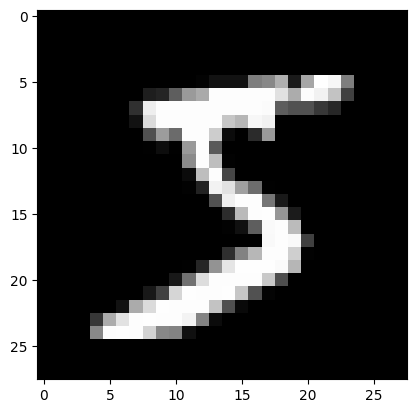

In [82]:
print("NAME : YAMUNAASRI T S")
print("REGNO : 212222240117")
plt.imshow(img_scaled.reshape(28,28),cmap='gray')

In [76]:
img_inv = 255.0 - img_28_gray
img_inv_scaled = img_inv.numpy()/255.0

In [77]:
x_single_prediction = np.argmax(model.predict(img_inv_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 18ms/step


In [78]:
print(x_single_prediction)

[5]
